# Montar drive y seleccionar carpeta de TT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Ruta de la carpeta en Google Drive
carpeta_drive = '/content/drive/My Drive/TT'
# Cambia la ruta de la carpeta_drive por la ruta real de la carpeta en tu Google Drive
os.chdir(carpeta_drive)

In [ ]:
!ls

archivo.csv  CODE  CORPUS  LEXICON  lexicon_sel.pkl  mi_dataframe.csv


# Readme
Si ya existen los archivos pkl  solo corre librerias y abre los docuentos  de la seccion guardar y abrir dataset solo ejecuta la segunda seccion de abrir los documentos   de ahi en adelante tu codigo

# Librerias

In [ ]:
!pip install xlrd


In [ ]:
!pip install -U spacy
!python -m spacy download es_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 29.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import spacy
import string
import pickle
import re
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# abrir archivo y dividivir
si quieres cambiar el corpus aqui cambia el nombre de la carpeta  igual si quieres volverlo a guardar o asi aqui

In [ ]:
import pandas as pd

# Cargar el archivo .pkl
data = pd.read_pickle('lexicon_sel.pkl')


print(data)

{'abundancia': [('Alegría', '0.83')], 'acabalar': [('Alegría', '0.396')], 'acallar': [('Alegría', '0.198')], 'acatar': [('Alegría', '0.198')], 'acción': [('Alegría', '0.397')], 'aceptable': [('Alegría', '0.594')], 'aceptación': [('Alegría', '0.696')], 'acicate': [('Alegría', '0.429')], 'aclamación': [('Alegría', '0.799')], 'aclamar': [('Alegría', '0.799')], 'acogedor': [('Alegría', '0.83')], 'acoger': [('Alegría', '0.729')], 'acomodadamente': [('Alegría', '0.729')], 'acuciar': [('Alegría', '0.264')], 'acucioso': [('Alegría', '0.232')], 'adecuar': [('Alegría', '0.331')], 'adicto': [('Alegría', '0.429')], 'admirable': [('Alegría', '0.764'), ('Sorpresa', '0.73')], 'admirablemente': [('Alegría', '0.765'), ('Sorpresa', '0.663')], 'admiración': [('Alegría', '0.765'), ('Sorpresa', '0.764')], 'admirar': [('Alegría', '0.731'), ('Sorpresa', '0.73')], 'admitir': [('Alegría', '0.53')], 'adorable': [('Alegría', '0.898')], 'adorablemente': [('Alegría', '0.865')], 'adoración': [('Alegría', '0.765')],

In [ ]:
#si solo quieres cambiar el corpus con el que se trabaja cambia aqui  y  sigue las instrucciones del readme
nombredecarpetaatrabajar="IMDB/"
#nombredecarpetaatrabajar="TASS/"
#nombredecarpetaatrabajar="REST_MEX/"
#nombredecarpetaatrabajar="SENTIMENTS/"

In [ ]:
#sentiments
#nombredearchivo="sentiment_analysis_dataset.csv"
#IMDB
nombredearchivo="IMDBDatasetSPANISH.csv"
#REST MEX
##nombredearchivo="Rest_Mex_Sentiment_Analysis_2023_Train.xlsx"
#nombredearchivo="tass.csv"
nombre_archivo = 'CORPUS/'+ nombredecarpetaatrabajar+nombredearchivo
print(nombre_archivo)



CORPUS/IMDB/IMDBDatasetSPANISH.csv


In [ ]:
# Función para detectar el tipo de archivo y cargarlo
def cargar_archivo(nombre_archivo):
    if nombre_archivo.endswith('.xlsx'):
        df = pd.read_excel(nombre_archivo)
    elif nombre_archivo.endswith('.csv'):
        df = pd.read_csv(nombre_archivo)
    else:
        raise ValueError("Formato de archivo no compatible.")
    return df

# Cargar el archivo
try:
    datos = cargar_archivo(nombre_archivo)

    print("Archivo cargado con éxito.")
except ValueError as e:
    print("Error:", e)

Archivo cargado con éxito.


## Binarizar IMDB


In [ ]:
datos['sentimiento'] = datos['sentimiento'].replace({'positivo': 1, 'negativo': 0})


## Binarizar TASS


In [ ]:
print(datos)


                 tweetid            user  \
0     142389495503925248      ccifuentes   
1     142389933619945473  CarmendelRiego   
2     142391947707940864  CarmendelRiego   
3     142416095012339712    mgilguerrero   
4     142422495721562112        paurubio   
...                  ...             ...   
7214  189809904935120896    mariviromero   
7215  189814854503235584    mariviromero   
7216  189815389021143041    mariviromero   
7217  189824278827507712      Tonicanto1   
7218  189830265655410688    RodolfoIrago   

                                                content                 date  \
0           Salgo de #VeoTV , que día más largoooooo...  2011-12-02T00:47:55   
1     @PauladeLasHeras No te libraras de ayudar me/n...  2011-12-02T00:49:40   
2                             @marodriguezb Gracias MAR  2011-12-02T00:57:40   
3     Off pensando en el regalito Sinde, la que se v...  2011-12-02T02:33:37   
4     Conozco a alguien q es adicto al drama! Ja ja ...  2011-12-02T02:

In [ ]:
datos['sentiment_valueBinarizado'] = datos['sentiment_value'].replace({'P': 1,'P+': 1, 'NEU':np.nan ,'NONE':np.nan,'N+':0,'N': 0})

In [ ]:

antes = len(datos)

datos.dropna(subset=['sentiment_valueBinarizado'], inplace=True)
despues = len(datos)

print("Número de filas antes de eliminar NaN:", antes)
print("Número de filas después de eliminar NaN:", despues)

Número de filas antes de eliminar NaN: 7219
Número de filas después de eliminar NaN: 5066


## Binarizar REST

In [ ]:

# Contar filas antes de eliminar NaN
antes = len(datos)

# Reemplazar los valores en la columna 'Polarity'
datos['Polarity'] = datos['Polarity'].replace({1: 0, 2: 0, 3 : np.nan, 4: 1, 5: 1})

# Eliminar filas con NaN en la columna 'Polarity'
datos.dropna(subset=['Polarity'], inplace=True)

print(datos)

# Contar filas después de eliminar NaN
despues = len(datos)

print("Número de filas antes de eliminar NaN:", antes)
print("Número de filas después de eliminar NaN:", despues)


                                Title  \
0                   LINDA EXPERIENCIA   
1                         Plaza típca   
2              Tres días en La Habana   
3                         Recomendado   
4              Caro pero vale la pena   
...                               ...   
251697  Verdadera joya arquitectónica   
251698                      Romántico   
251699             Parece un castillo   
251700                     Imperdible   
251701               Muy bonita vista   

                                                   Review  Polarity   Country  \
0       Hermoso lugar para admirar las obras de Botero...       1.0  Colombia   
1       No puedes dejar pasar sus vistas y arquitectur...       1.0      Cuba   
2       Este es un hotel lleno de historia y carácter....       1.0      Cuba   
3       Justo lo que buscaba. Sabores exoticos, buena ...       1.0  Colombia   
4       La comida es muy buena, desde las entradas has...       1.0    Mexico   
...                  

In [ ]:
datos['Title'] = datos['Title'].astype(str)
datos['Review'] = datos['Review'].astype(str)
datos['TituloyResena'] = datos['Title'].str.cat(datos['Review'], sep=' ')

## Binarizar Sentiments

In [ ]:
palabras_positivas = ['peaceful', 'powerful', 'joyful', 'loving', 'thankful', 'secure', 'confident', 'successful', 'surprised', 'playful', 'optimistic', 'daring']
palabras_no_positivas = ['scared', 'mad', 'sad', 'overwhelmed', 'embarrassed', 'jealous', 'irritated', 'frustrated', 'distant', 'stupid', 'isolated', 'sleepy', 'responsive']

# Reemplazar palabras positivas por 1 y palabras no positivas por 0
mapeo = {palabra: 1 for palabra in palabras_positivas}
mapeo.update({palabra: 0 for palabra in palabras_no_positivas})
datos = datos.loc[datos['sentiment'] != 'peaceful']
# Realizar el reemplazo en la columna 'sentimientos'
datos['sentiment'] = datos['sentiment'].replace(mapeo)
datos['emotion'] = datos['emotion'].replace(mapeo)

datos.drop(['emotion'], axis=1, inplace=True)


## Divide el dataset y guarda dataset


In [ ]:
#este es para guardarlo completo
datos.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_dataemition.pkl')

In [ ]:
train_data, test_data = train_test_split(datos, test_size=0.2, random_state=42)

In [ ]:
# Guardar los conjuntos de datos
train_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')
test_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

# abre ,verifica cantidad y datos

In [ ]:
full_data = pd.read_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_dataemition.pkl')

In [ ]:
# Cargar los conjuntos de datos desde los archivos .pkl
train_data = pd.read_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')
test_data = pd.read_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

In [ ]:
print("Conjunto de datos de entrenamiento:")
print(full_data.head())
print("Cantidad de datos en el conjunto de prueba:", len(full_data))

Conjunto de datos de entrenamiento:
   Unnamed: 0                                          review_en  \
0           0  One of the other reviewers has mentioned that ...   
1           1  A wonderful little production. The filming tec...   
2           2  I thought this was a wonderful way to spend ti...   
3           3  Basically there's a family where a little boy ...   
4           4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_es sentiment  sentimiento  \
0  Uno de los otros críticos ha mencionado que de...  positive            1   
1  Una pequeña pequeña producción.La técnica de f...  positive            1   
2  Pensé que esta era una manera maravillosa de p...  positive            1   
3  Básicamente, hay una familia donde un niño peq...  negative            0   
4  El "amor en el tiempo" de Petter Mattei es una...  positive            1   

                                               lemma  PolaridadEstimada  \
0  cr

In [ ]:
from google.colab import files
# Paso 3: Guardar el DataFrame como un archivo CSV
test_data.to_csv('mi_dataframe.csv', index=False)

# Paso 4: Descargar el archivo CSV
files.download('mi_dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Visualizar el conjunto de datos de entrenamiento
print("Conjunto de datos de entrenamiento:")
print(train_data.head())

# Visualizar el conjunto de datos de prueba
print("\nConjunto de datos de prueba:")
print(test_data.head())

# Visualizar la cantidad de datos en cada conjunto
print("Cantidad de datos en el conjunto de entrenamiento:", len(train_data))
print("Cantidad de datos en el conjunto de prueba:", len(test_data))



Conjunto de datos de entrenamiento:
       Unnamed: 0                                          review_en  \
39087       39087  That's what I kept asking myself during the ma...   
30893       30893  I did not watch the entire movie. I could not ...   
45278       45278  A touching love story reminiscent of In the M...   
16398       16398  This latter-day Fulci schlocker is a totally a...   
13653       13653  First of all, I firmly believe that Norwegian ...   

                                               review_es sentiment  \
39087  Eso es lo que seguí preguntándome durante las ...  negative   
30893  No vi a toda la película. No pude ver la pelíc...  negative   
45278  Una historia de amor conmovedora que recuerda ...  positive   
16398  Este último día Fulci Schlocker es una mezcla ...  negative   
13653  En primer lugar, creo firmemente que las pelíc...  negative   

       sentimiento  
39087            0  
30893            0  
45278            1  
16398            0  
13653

# CODIGO




## funciones Globales


In [ ]:
# Cargar el modelo en español
nlp = spacy.load("es_core_news_sm")
# Definir una lista de stop words personalizada si es necesario
stop_words = spacy.lang.es.stop_words.STOP_WORDS

palabras_a_excluir = {
    'bueno', 'mejor', 'bien', 'buen', 'buena', 'mal', 'malo', 'peor',
    'importante', 'importantes',
    'nuevo', 'nueva', 'nuevos', 'nuevas', 'menor', 'menores',
    'mejores', 'peores',
    'buenos', 'malos', 'mucha', 'muchas', 'muchos', 'mucho', 'pocos', 'poca',
    'poco', 'demasiado', 'demasiada', 'demasiados', 'demasiadas'
}
stop_words -= palabras_a_excluir
# Definir una lista de signos de puntuación
puntuacion = string.punctuation
contador_llamadas = 0


def filtrar_texto(texto):
    global contador_llamadas
    contador_llamadas += 1
    print(contador_llamadas)
    # Procesar el texto
    texto =texto.lower()
    doc = nlp(texto)
    # Filtrar las tokens que no son stop words ni signos de puntuación
    tokens_filtrados = [token.lemma_ for token in doc if not token.is_stop and token.lemma_ not in puntuacion]
    # Unir las tokens filtradas en un string nuevamente
    texto_filtrado = " ".join(tokens_filtrados)
    return texto_filtrado

In [ ]:
mi_variable_global1=0
def load_sel():
	#~ global lexicon_sel
	lexicon_sel = {}
	input_file = open('LEXICON/SEL_full.txt', 'r')
	for line in input_file:
		#Las líneas del lexicon tienen el siguiente formato:
		#abundancia	0	0	50	50	0.83	Alegría

		palabras = line.split("\t")
		palabras[6]= re.sub('\n', '', palabras[6])
		pair = (palabras[6], palabras[5])
		if lexicon_sel:
			if palabras[0] not in lexicon_sel:
				lista = [pair]
				lexicon_sel[palabras[0]] = lista
			else:
				lexicon_sel[palabras[0]].append (pair)
		else:
			lista = [pair]
			lexicon_sel[palabras[0]] = lista
	input_file.close()
	del lexicon_sel['Palabra']; #Esta llave se inserta porque es parte del encabezado del diccionario, por lo que se requiere eliminar
	#Estructura resultante
	return lexicon_sel

def getSELFeatures(cadena):
	global mi_variable_global1
	mi_variable_global1 +=1
	print(mi_variable_global1)
	if (os.path.exists('lexicon_sel.pkl')):
		lexicon_sel_file = open ('lexicon_sel.pkl','rb')
		lexicon_sel = pickle.load(lexicon_sel_file)
	else:
		lexicon_sel = load_sel()
		lexicon_sel_file = open ('lexicon_sel.pkl','wb')
		pickle.dump(lexicon_sel, lexicon_sel_file)
		lexicon_sel_file.close()
	valor_alegria = 0.0
	valor_enojo = 0.0
	valor_miedo = 0.0
	valor_repulsion = 0.0
	valor_sorpresa = 0.0
	valor_tristeza = 0.0
	cadena_palabras = re.split(' ', cadena)

	dic = {}
	dic["palabrasTristes"] = []
	dic["palabrasAlegres"] = []
	for palabra in cadena_palabras:
		if palabra in lexicon_sel:
			caracteristicas = lexicon_sel[palabra]

			for emocion, valor in caracteristicas:
				if emocion == 'Alegría':
					valor_alegria = valor_alegria + float(valor)
					dic["palabrasAlegres"].append((palabra,emocion,valor))
				elif emocion == 'Tristeza':
					valor_tristeza = valor_tristeza + float(valor)
					dic["palabrasTristes"].append((palabra,emocion,valor))
				elif emocion == 'Enojo':
					valor_enojo = valor_enojo + float(valor)
					dic["palabrasTristes"].append((palabra,emocion,valor))
				elif emocion == 'Repulsión':
					valor_repulsion = valor_repulsion + float(valor)
					dic["palabrasTristes"].append((palabra,emocion,valor))
				elif emocion == 'Miedo':
					valor_miedo = valor_miedo + float(valor)
					dic["palabrasTristes"].append((palabra,emocion,valor))
				elif emocion == 'Sorpresa':
					valor_sorpresa = valor_sorpresa + float(valor)
					dic["palabrasAlegres"].append((palabra,emocion,valor))
	dic['__alegria__'] = valor_alegria
	dic['__tristeza__'] = valor_tristeza
	dic['__enojo__'] = valor_enojo
	dic['__repulsion__'] = valor_repulsion
	dic['__miedo__'] = valor_miedo
	dic['__sorpresa__'] = valor_sorpresa

	dic['acumuladopositivo'] = dic['__alegria__'] + dic['__sorpresa__']
	dic['acumuladonegative'] = dic['__enojo__'] + dic['__miedo__'] + dic['__repulsion__'] + dic['__tristeza__']
	dif_polarity = dic["acumuladopositivo"]-dic["acumuladonegative"]

	if dif_polarity ==0:
		dif_polarity = 2
	elif dif_polarity < 0:
		dif_polarity = 0
	else:
		dif_polarity = 1




	return dif_polarity,dic["palabrasTristes"] ,dic["palabrasAlegres"]

## Codigo para IMDB test


In [ ]:

tst='''ADVERTENCIA: Los spoilers, querido Roger. Durante tu distinguida carrera, has hecho una amplia gama de entretenimiento, algunos buenos, algunos malos. "La noche de la bestia de la sangre" cae en la última categoría. No es tan poco frecuente como, digamos, "El fantasma de 10,000 leguas" o, tal vez, "El horror de Dunwich". No obstante, una de mis mayores críticas a esta película es que podría haberse hecho más rápida, mejor y más barata.
Al comienzo de los títulos, Roger, las secuencias de cohetes se parecen a algo del "Hombre al espacio" de Disney, no tan bueno, por supuesto. El cohete futurista parece nada en comparación con el contemporáneo de 1958. ¿Por qué no usaste una vanguardia, Atlas o incluso un lanzamiento de vikingo? Mejor aún, ¿por qué no prescindir completamente del lanzamiento y comenzar con una toma del espacio y la cápsula flotando en él? Eso es lo que habría hecho por ti, Roger.
En segundo lugar, ¿por qué hacer que la nave espacial se estrelle al reingresar? Incluso un estudiante de física de la escuela intermedia podría haberte dicho que tu astronauta habría llegado a la Tierra extra crujiente y en gran parte deshuesado. Hubiera demostrado que tu astronauta se estaba volviendo "poseído" por el monstruo (tal vez usando esa gran "cosa negativa/positiva" que usaste en "Guerra de los satélites"), perdiendo contacto con la Tierra y aterrizando en el desierto. Eso también explicaría cómo la "bestia de sangre" podría impregnar a tu astronauta durante el tremendo calor del reingreso, pero aun así ser destruida por el fuego. Incluso con estas fallas, la primera mitad de tu película es bastante buena. Si hubieras gastado algo de dinero en música decente, habría sido tan buena como un episodio mediocre de "Límites externos".
Pero, una vez más, tu escritor describe a Ed Nelson como diseñador del sistema de aterrizaje, luego le da un diálogo estúpido con respecto al magnetismo. El mayor problema con la segunda mitad de "La noche de la bestia de la sangre" es Michael Emmet. Es terrible como el astronauta condenado. Deberías haberlo despedido en el acto y reemplazarlo con Ed Nelson. Podrías haber combinado las responsabilidades de Nelson con las de John Dunlap y ahorrado el costo de un actor. No sé si realmente pagaste a cualquiera de estas personas; pero, al menos, habrías ahorrado el costo del catering de tres comidas al día.
También habría abandonado el disfraz de "loro chamuscado" y gastado el dinero extra usando maquillaje para que el astronauta se convirtiera en la "bestia de sangre". Tal vez eso era un poco similar a "El extraño que regresó de lo desconocido", pero habría ayudado enormemente al ritmo de la segunda mitad. Si vas a tener una "bestia de sangre", ¿no sería una buena idea mostrar un poco de sangre? Sí, sé que el título proviene de los embriones en la sangre del astronauta, pero Kowalski podría haber hecho un mejor trabajo para ti si vertiera un poco de jarabe de chocolate. Después de todo, parece sangre en blanco y negro. ¿Qué costaría eso, tal vez dos dólares?
También habría utilizado algunos primeros planos. Por alguna razón, el diálogo insípido y la mala actuación no parecen tan malos en los primeros planos. Mira la serie de televisión de los 70 y verás lo que quiero decir. Oh, para cerrar, Roger, una nota para tu escritor. No puedes usar un fluoroscopio para mostrar a algún pobre tipo lleno de embriones alienígenas cuando no tienes electricidad. ¿Recuerdas, freíste el generador en el primer rollo? Ah, y casi lo olvidé. Roger, ¿no pudiste pagar un cuchillo falso? Ya sabes, el tipo donde la hoja entra en el mango. Tuve uno de esos cuando tenía 9 años, lo que también sucede para ser el año de "La noche de la bestia de la sangre". Costaría, tal vez, otros dos dólares. Creo que sabía lo suficiente entonces para hacerte una mejor película. Sé que sé lo suficiente ahora para hacerlo.
Entonces, Roger, si decides rehacer "La noche de la bestia de la sangre", o si estás buscando un escritor/director para que trabaje contigo en algún otro proyecto, soy tu hombre. Trabajaré barato, porque realmente me gustaría hacer una película para ti, Roger.
Doy "Night of the Blood Beast" un "3".
Nota especial: Si deseas ver películas kitsch como "La noche de la bestia de la sangre", el DVD que compré por $3.99 fue de muy buena calidad. También puedes obtener "Night of the Blood Beast", junto con muchas otras terribles películas de horror/sci-fi en lugares como BestBuy por alrededor de $6.'''
v=filtrar_texto(tst)
vs=getSELFeatures(v)
print(vs)

1
1
(0, [('malo', 'Enojo', '0.561'), ('malo', 'Miedo', '0.663'), ('malo', 'Tristeza', '0.265'), ('sangre', 'Miedo', '0.396'), ('sangre', 'Repulsión', '0.364'), ('caer', 'Tristeza', '0.528'), ('fantasma', 'Miedo', '0.596'), ('horror', 'Miedo', '0.966'), ('horror', 'Repulsión', '0.764'), ('poseído', 'Miedo', '0.63'), ('guerra', 'Enojo', '0.832'), ('perder', 'Tristeza', '0.629'), ('desierto', 'Tristeza', '0.099'), ('sangre', 'Miedo', '0.396'), ('sangre', 'Repulsión', '0.364'), ('tremendo', 'Miedo', '0.564'), ('sangre', 'Miedo', '0.396'), ('sangre', 'Repulsión', '0.364'), ('terrible', 'Miedo', '0.898'), ('abandonar', 'Tristeza', '0.898'), ('sangre', 'Miedo', '0.396'), ('sangre', 'Repulsión', '0.364'), ('sangre', 'Miedo', '0.396'), ('sangre', 'Repulsión', '0.364'), ('sangre', 'Miedo', '0.396'), ('sangre', 'Repulsión', '0.364'), ('sangre', 'Miedo', '0.396'), ('sangre', 'Repulsión', '0.364'), ('sangre', 'Miedo', '0.396'), ('sangre', 'Repulsión', '0.364'), ('negro', 'Tristeza', '0.198'), ('mal

In [ ]:
test_data['lemma'] = test_data['review_es'].apply(filtrar_texto)
test_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

In [ ]:
results=test_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
test_data['PolaridadEstimada'] = P_list
test_data['PalabrasNegativas'] = pN_list
test_data['PalabrasPositivas'] = pP_list


In [ ]:
test_data_r = test_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", test_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", test_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", test_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", test_data_r['lemma'][0])

test_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')


In [ ]:
# Ejemplo de resultados de clasificación
y_true = test_data_r['sentimiento']
y_pred = test_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
test_data_r['sentimiento'] = test_data_r['sentimiento'].map(sentimiento_mapping)
test_data_r['PolaridadEstimada'] = test_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(test_data_r['sentimiento'], test_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

## Codigo de IMDB entrenamiento aun no esta hecho




In [ ]:
train_data['lemma'] = test_data['review_es'].apply(filtrar_texto)
train_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')

Se truncaron las últimas líneas 5000 del resultado de transmisión.
22828
22829
22830
22831
22832
22833
22834
22835
22836
22837
22838
22839
22840
22841
22842
22843
22844
22845
22846
22847
22848
22849
22850
22851
22852
22853
22854
22855
22856
22857
22858
22859
22860
22861
22862
22863
22864
22865
22866
22867
22868
22869
22870
22871
22872
22873
22874
22875
22876
22877
22878
22879
22880
22881
22882
22883
22884
22885
22886
22887
22888
22889
22890
22891
22892
22893
22894
22895
22896
22897
22898
22899
22900
22901
22902
22903
22904
22905
22906
22907
22908
22909
22910
22911
22912
22913
22914
22915
22916
22917
22918
22919
22920
22921
22922
22923
22924
22925
22926
22927
22928
22929
22930
22931
22932
22933
22934
22935
22936
22937
22938
22939
22940
22941
22942
22943
22944
22945
22946
22947
22948
22949
22950
22951
22952
22953
22954
22955
22956
22957
22958
22959
22960
22961
22962
22963
22964
22965
22966
22967
22968
22969
22970
22971
22972
22973
22974
22975
22976
22977
22978
22979
22980
22981
22982
229

KeyboardInterrupt: 

In [ ]:
results=train_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
train_data['PolaridadEstimada'] = P_list
train_data['PalabrasNegativas'] = pN_list
train_data['PalabrasPositivas'] = pP_list

In [ ]:
train_data_r = train_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", train_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", train_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", train_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", train_data_r['lemma'][0])

train_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')

In [ ]:
# Ejemplo de resultados de clasificación
y_true = train_data_r['sentimiento']
y_pred = train_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
train_data_r['sentimiento'] = train_data_r['sentimiento'].map(sentimiento_mapping)
train_data_r['PolaridadEstimada'] = train_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(train_data_r['sentimiento'], train_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

## Codigo de twitter test



In [ ]:
test_data['lemma'] = test_data['text'].apply(filtrar_texto)
test_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

In [ ]:
results=test_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
test_data['PolaridadEstimada'] = P_list
test_data['PalabrasNegativas'] = pN_list
test_data['PalabrasPositivas'] = pP_list

In [ ]:
test_data_r = test_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", test_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", test_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", test_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", test_data_r['lemma'][0])

test_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

Polaridad Estimada: 2
Palabras Negativas: []
Palabras Positivas: []
Palabras Positivas: proceso agotar


In [ ]:
# Ejemplo de resultados de clasificación
y_true = test_data_r['sentiment']
y_pred = test_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.79      0.35      0.49       219
           1       0.60      0.66      0.63       167
           2       0.00      1.00      0.00         0

    accuracy                           0.48       386
   macro avg       0.46      0.67      0.37       386
weighted avg       0.71      0.48      0.55       386

Accuracy: 0.4844559585492228


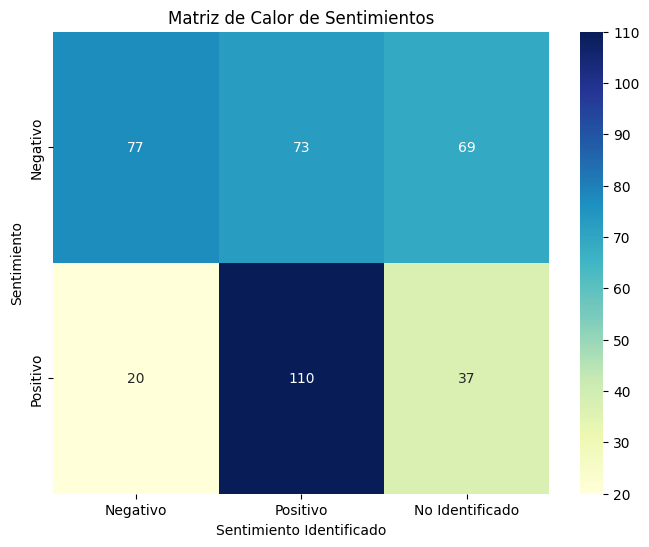

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
test_data_r['sentiment'] = test_data_r['sentiment'].map(sentimiento_mapping)
test_data_r['PolaridadEstimada'] = test_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(test_data_r['sentiment'], test_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

## Codigo de twitter entrenamiento




In [ ]:
train_data['lemma'] = train_data['text'].apply(filtrar_texto)
train_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')

In [ ]:
results=train_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
train_data['PolaridadEstimada'] = P_list
train_data['PalabrasNegativas'] = pN_list
train_data['PalabrasPositivas'] = pP_list

In [ ]:
train_data_r = train_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", train_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", train_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", train_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", train_data_r['lemma'][0])

train_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')

Polaridad Estimada: 1
Palabras Negativas: []
Palabras Positivas: [('victorioso', 'Alegría', '0.797')]
Palabras Positivas: — ah culpo ...   hm entender suponer salir victorioso tema inferioridad deber problema


In [ ]:
# Ejemplo de resultados de clasificación
y_true = train_data_r['sentiment']
y_pred = train_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.39      0.52       941
           1       0.54      0.57      0.56       603
           2       0.00      1.00      0.00         0

    accuracy                           0.46      1544
   macro avg       0.44      0.65      0.36      1544
weighted avg       0.69      0.46      0.53      1544

Accuracy: 0.4566062176165803


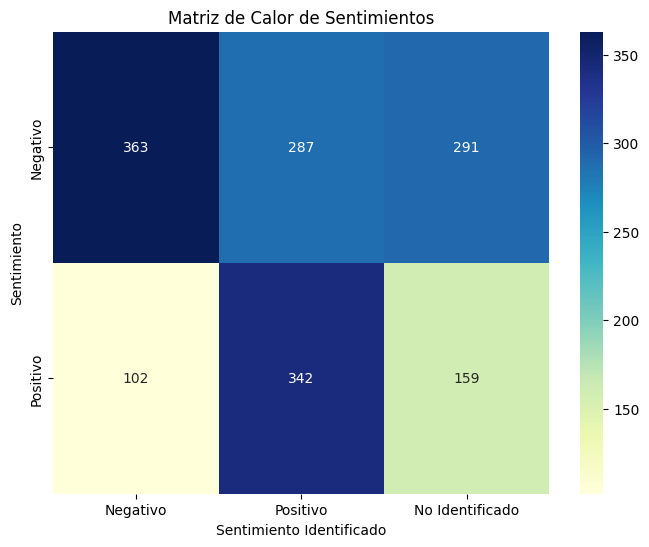

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
train_data_r['sentiment'] = train_data_r['sentiment'].map(sentimiento_mapping)
train_data_r['PolaridadEstimada'] = train_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(train_data_r['sentiment'], train_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

##codigo de restmex test

In [ ]:
test_data['lemma'] = test_data['TituloyResena'].apply(filtrar_texto)
test_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

In [ ]:
results=test_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
test_data['PolaridadEstimada'] = P_list
test_data['PalabrasNegativas'] = pN_list
test_data['PalabrasPositivas'] = pP_list

In [ ]:
test_data_r = test_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", test_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", test_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", test_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", test_data_r['lemma'][0])

test_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

Polaridad Estimada: 1
Palabras Negativas: []
Palabras Positivas: ['llegar', 'bien', 'amable', 'agradable', 'bien', 'bien']
Palabras Positivas: buen punto partida principiant Kuba Pasamos Semana Santa parecer hotel infraestructura buen ubicación 10 k -3 Habana fácil llegar taxi 15 CUC Bonito limpio bien equipado buen tamaño Servicio amable zona piscina agradable comida bien encontrar opción Habana viejo opción básico comida calidad menú desayuno buffet super bien equipado mejor calidad hotel caro buen punto partida vacación familia


In [ ]:
# Ejemplo de resultados de clasificación
y_true = test_data_r['Polarity']
y_pred = test_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.26      0.50      0.34      2541
         1.0       0.97      0.81      0.88     43469
         2.0       0.00      1.00      0.00         0

    accuracy                           0.79     46010
   macro avg       0.41      0.77      0.41     46010
weighted avg       0.93      0.79      0.85     46010

Accuracy: 0.7934362095196696


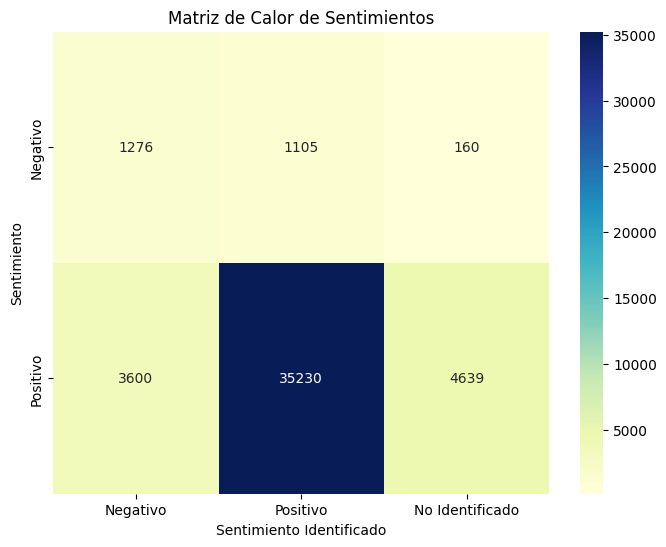

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
test_data_r['Polarity'] = test_data_r['Polarity'].map(sentimiento_mapping)
test_data_r['PolaridadEstimada'] = test_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(test_data_r['Polarity'], test_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

## Codigo de restmex entrenamiento




In [ ]:
train_data['lemma'] = train_data['TituloyResena'].apply(filtrar_texto)
train_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')

In [ ]:
results=train_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
train_data['PolaridadEstimada'] = P_list
train_data['PalabrasNegativas'] = pN_list
train_data['PalabrasPositivas'] = pP_list

In [ ]:
train_data_r = train_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", train_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", train_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", train_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", train_data_r['lemma'][0])

train_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')

Polaridad Estimada: 1
Palabras Negativas: []
Palabras Positivas: ['excelente', 'bien', 'bueno', 'acogedor']
Palabras Positivas: Deliciosa comida excelente opción comer centro histórico Puebla platillo excelentemente preparado cocina poblán toque original chef 
 viejo casona bien restaurado 
 servicio bueno lugar acogedor terraza ideal ...


In [ ]:
# Ejemplo de resultados de clasificación
y_true = train_data_r['Polarity']
y_pred = train_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.27      0.51      0.35     10183
         1.0       0.97      0.81      0.88    173853
         2.0       0.00      1.00      0.00         0

    accuracy                           0.80    184036
   macro avg       0.41      0.77      0.41    184036
weighted avg       0.93      0.80      0.85    184036

Accuracy: 0.7953552565802343


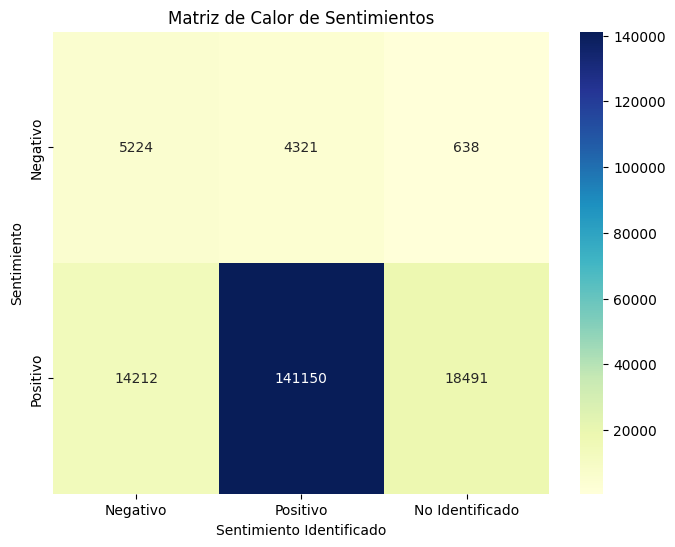

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
train_data_r['Polarity'] = train_data_r['Polarity'].map(sentimiento_mapping)
train_data_r['PolaridadEstimada'] = train_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(train_data_r['Polarity'], train_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

##codigo TASS

In [ ]:
test_data['lemma'] = test_data['content'].apply(filtrar_texto)
test_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
results=test_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
test_data['PolaridadEstimada'] = P_list
test_data['PalabrasNegativas'] = pN_list
test_data['PalabrasPositivas'] = pP_list

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
test_data_r = test_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", test_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", test_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", test_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", test_data_r['lemma'][0])

test_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/test_data.pkl')

Polaridad Estimada: 2
Palabras Negativas: []
Palabras Positivas: []
Palabras Positivas: valencia españa recomeir exposición http://t.co/hkjrpj9b


In [ ]:
# Ejemplo de resultados de clasificación
y_true = test_data_r['sentiment_valueBinarizado']
y_pred = test_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.80      0.26      0.40       450
         1.0       0.75      0.47      0.58       564
         2.0       0.00      1.00      0.00         0

    accuracy                           0.38      1014
   macro avg       0.52      0.58      0.32      1014
weighted avg       0.77      0.38      0.50      1014

Accuracy: 0.3777120315581854


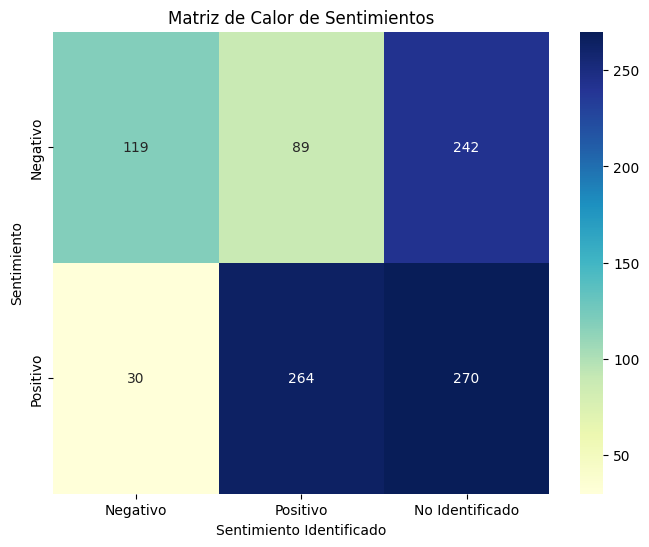

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
test_data_r['sentiment_valueBinarizado'] = test_data_r['sentiment_valueBinarizado'].map(sentimiento_mapping)
test_data_r['PolaridadEstimada'] = test_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(test_data_r['sentiment_valueBinarizado'], test_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

## Codigo de TASS entrenamiento




In [ ]:
train_data['lemma'] = train_data['content'].apply(filtrar_texto)
train_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')

In [ ]:
results=train_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
train_data['PolaridadEstimada'] = P_list
train_data['PalabrasNegativas'] = pN_list
train_data['PalabrasPositivas'] = pP_list

In [ ]:
train_data_r = train_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", train_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", train_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", train_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", train_data_r['lemma'][0])

train_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/train_data.pkl')

Polaridad Estimada: 2
Palabras Negativas: []
Palabras Positivas: []
Palabras Positivas: ajuste puritano acabar reaccionamos recorte cierre empresa paro déficit volver empezar


In [ ]:
# Ejemplo de resultados de clasificación
y_true = train_data_r['sentiment_valueBinarizado']
y_pred = train_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.81      0.24      0.37      1732
         1.0       0.72      0.42      0.53      2320
         2.0       0.00      1.00      0.00         0

    accuracy                           0.34      4052
   macro avg       0.51      0.55      0.30      4052
weighted avg       0.76      0.34      0.46      4052

Accuracy: 0.3425468904244817


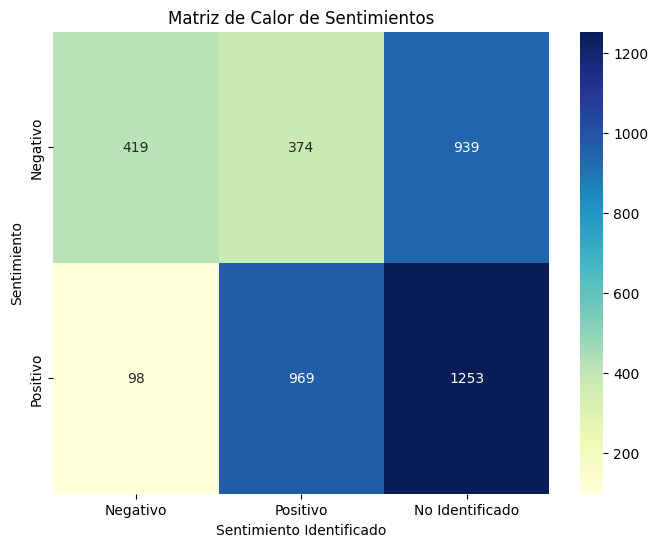

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
train_data_r['sentiment_valueBinarizado'] = train_data_r['sentiment_valueBinarizado'].map(sentimiento_mapping)
train_data_r['PolaridadEstimada'] = train_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(train_data_r['sentiment_valueBinarizado'], train_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

## Codigo de SEntiments full



In [ ]:
full_data['lemma'] = full_data['text'].apply(filtrar_texto)
full_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_data.pkl')

In [ ]:
results=full_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
full_data['PolaridadEstimada'] = P_list
full_data['PalabrasNegativas'] = pN_list
full_data['PalabrasPositivas'] = pP_list

In [ ]:
full_data_r = full_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", full_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", full_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", full_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", full_data_r['lemma'][0])

full_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_dataemition.pkl')

Polaridad Estimada: 1
Palabras Negativas: []
Palabras Positivas: [('bien', 'Alegría', '0.798')]
Palabras Positivas: terminar bien abrumar


In [ ]:
# Ejemplo de resultados de clasificación
y_true = full_data_r['sentiment']
y_pred = full_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.38      0.51      1160
           1       0.56      0.59      0.57       770
           2       0.00      1.00      0.00         0

    accuracy                           0.46      1930
   macro avg       0.45      0.66      0.36      1930
weighted avg       0.69      0.46      0.54      1930

Accuracy: 0.46217616580310883


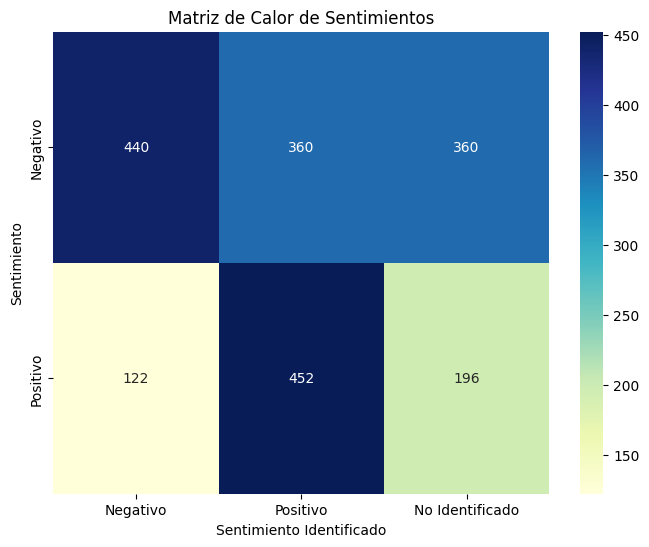

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
full_data_r['sentiment'] = full_data_r['sentiment'].map(sentimiento_mapping)
full_data_r['PolaridadEstimada'] = full_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(full_data_r['sentiment'], full_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

In [ ]:
import spacy

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Frase original
sentence = "estas LINDA EXPERIENCIA"

#sentence =sentence.lower()

print(sentence)

# Tokenizar la frase
doc = nlp(sentence)

# Lematizar cada palabra
lemmatized_words = [token.lemma_ for token in doc]

# Unir las palabras lematizadas en una frase
lemmatized_sentence = ' '.join(lemmatized_words)

# Imprimir los resultados
print("Frase original:", sentence)
print("Frase lematizada:", lemmatized_sentence)


estas LINDA EXPERIENCIA
Frase original: estas LINDA EXPERIENCIA
Frase lematizada: este LINDA EXPERIENCIA


In [ ]:
# Paso 2: Cargar los datos desde el archivo PKL
with open('CORPUS/'+nombredecarpetaatrabajar+'/full_data.pkl', 'rb') as f:
    datos_pkl = pickle.load(f)

# Paso 3: Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(datos_pkl)

# Paso 4: Guardar el DataFrame en un archivo CSV
df.to_csv('archivo.csv', index=False)


In [ ]:
señales="admirar"

aplicicaion = getSELFeatures(señales)
print(aplicicaion)


1
[('Alegría', '0.731'), ('Sorpresa', '0.73')]
admirar
(1, [], [('admirar', 'Alegría', '0.731'), ('admirar', 'Sorpresa', '0.73')])


## Codigo de IMDB full



In [ ]:
full_data['lemma'] = full_data['review_es'].apply(filtrar_texto)
full_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_data.pkl')

In [ ]:
results=full_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
full_data['PolaridadEstimada'] = P_list
full_data['PalabrasNegativas'] = pN_list
full_data['PalabrasPositivas'] = pP_list

In [ ]:
full_data_r = full_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", full_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", full_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", full_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", full_data_r['lemma'][0])

full_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_dataemition.pkl')

Polaridad Estimada: 0
Palabras Negativas: [('violencia', 'Enojo', '0.932'), ('tímido', 'Miedo', '0.531'), ('violencia', 'Enojo', '0.932'), ('muerte', 'Miedo', '0.865'), ('muerte', 'Tristeza', '0.865'), ('desagradable', 'Enojo', '0.53'), ('desagradable', 'Repulsión', '0.898'), ('violencia', 'Enojo', '0.932'), ('violencia', 'Enojo', '0.932'), ('injusticia', 'Tristeza', '0.496'), ('oscuro', 'Tristeza', '0.066')]
Palabras Positivas: [('corazón', 'Alegría', '0.33'), ('atractivo', 'Alegría', '0.696'), ('encanto', 'Alegría', '0.562'), ('sorprender', 'Sorpresa', '0.966'), ('gusto', 'Alegría', '0.629'), ('cómodo', 'Alegría', '0.695')]
Palabras Positivas: crítico mencionar 1 oz episodio enganchado razón exactamente suceder cosa golpear oz brutalidad escena violencia inconfiada encontrar derecha palabra confiar espectáculo débil corazón tímido espectáculo extraer punzón droga sexo violencia hardcore clásico palabra llamar oz apodo penitenciario seguridad máximo oswald centrar principalmente ciuda

In [ ]:
# Ejemplo de resultados de clasificación
y_true = full_data_r['sentimiento']
y_pred = full_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.52      0.60     25000
           1       0.62      0.75      0.68     25000
           2       0.00      1.00      0.00         0

    accuracy                           0.63     50000
   macro avg       0.44      0.76      0.43     50000
weighted avg       0.66      0.63      0.64     50000

Accuracy: 0.63292


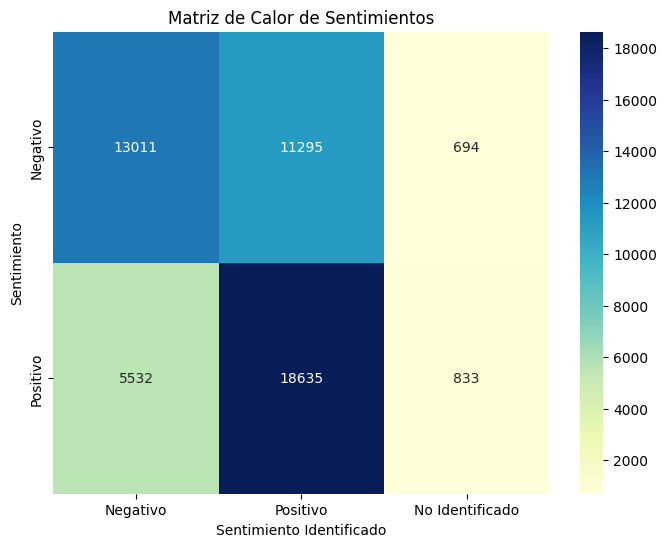

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
full_data_r['sentimiento'] = full_data_r['sentimiento'].map(sentimiento_mapping)
full_data_r['PolaridadEstimada'] = full_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(full_data_r['sentimiento'], full_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

In [ ]:
import spacy

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Frase original
sentence = "estas LINDA EXPERIENCIA"

#sentence =sentence.lower()

print(sentence)

# Tokenizar la frase
doc = nlp(sentence)

# Lematizar cada palabra
lemmatized_words = [token.lemma_ for token in doc]

# Unir las palabras lematizadas en una frase
lemmatized_sentence = ' '.join(lemmatized_words)

# Imprimir los resultados
print("Frase original:", sentence)
print("Frase lematizada:", lemmatized_sentence)


estas LINDA EXPERIENCIA
Frase original: estas LINDA EXPERIENCIA
Frase lematizada: este LINDA EXPERIENCIA


In [ ]:
# Paso 2: Cargar los datos desde el archivo PKL
with open('CORPUS/'+nombredecarpetaatrabajar+'/full_data.pkl', 'rb') as f:
    datos_pkl = pickle.load(f)

# Paso 3: Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(datos_pkl)

# Paso 4: Guardar el DataFrame en un archivo CSV
df.to_csv('archivo.csv', index=False)


In [ ]:
señales="admirar"

aplicicaion = getSELFeatures(señales)
print(aplicicaion)


1
[('Alegría', '0.731'), ('Sorpresa', '0.73')]
admirar
(1, [], [('admirar', 'Alegría', '0.731'), ('admirar', 'Sorpresa', '0.73')])


## Codigo de TASS full






In [ ]:
full_data['lemma'] = full_data['content'].apply(filtrar_texto)
full_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_data.pkl')

In [ ]:
results=full_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
full_data['PolaridadEstimada'] = P_list
full_data['PalabrasNegativas'] = pN_list
full_data['PalabrasPositivas'] = pP_list

In [ ]:
full_data_r = full_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", full_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", full_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", full_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", full_data_r['lemma'][0])

full_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_dataemition.pkl')

Polaridad Estimada: 2
Palabras Negativas: []
Palabras Positivas: []
Palabras Positivas: @marodriguezb gracias mar


In [ ]:
# Ejemplo de resultados de clasificación
y_true = full_data_r['sentiment_valueBinarizado']
y_pred = full_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.81      0.25      0.38      2182
         1.0       0.73      0.43      0.54      2884
         2.0       0.00      1.00      0.00         0

    accuracy                           0.35      5066
   macro avg       0.51      0.56      0.31      5066
weighted avg       0.76      0.35      0.47      5066

Accuracy: 0.3495854717726017


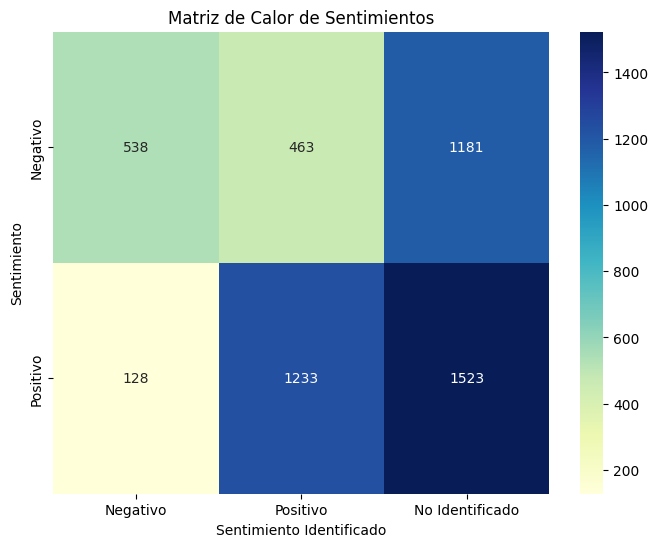

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
full_data_r['sentiment_valueBinarizado'] = full_data_r['sentiment_valueBinarizado'].map(sentimiento_mapping)
full_data_r['PolaridadEstimada'] = full_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(full_data_r['sentiment_valueBinarizado'], full_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

In [ ]:
import spacy

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Frase original
sentence = "estas LINDA EXPERIENCIA"

#sentence =sentence.lower()

print(sentence)

# Tokenizar la frase
doc = nlp(sentence)

# Lematizar cada palabra
lemmatized_words = [token.lemma_ for token in doc]

# Unir las palabras lematizadas en una frase
lemmatized_sentence = ' '.join(lemmatized_words)

# Imprimir los resultados
print("Frase original:", sentence)
print("Frase lematizada:", lemmatized_sentence)


estas LINDA EXPERIENCIA
Frase original: estas LINDA EXPERIENCIA
Frase lematizada: este LINDA EXPERIENCIA


In [ ]:
# Paso 2: Cargar los datos desde el archivo PKL
with open('CORPUS/'+nombredecarpetaatrabajar+'/full_data.pkl', 'rb') as f:
    datos_pkl = pickle.load(f)

# Paso 3: Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(datos_pkl)

# Paso 4: Guardar el DataFrame en un archivo CSV
df.to_csv('archivo.csv', index=False)


In [ ]:
señales="admirar"

aplicicaion = getSELFeatures(señales)
print(aplicicaion)


1
[('Alegría', '0.731'), ('Sorpresa', '0.73')]
admirar
(1, [], [('admirar', 'Alegría', '0.731'), ('admirar', 'Sorpresa', '0.73')])


## Codigo de restmex full



In [ ]:
full_data['lemma'] = full_data['TituloyResena'].apply(filtrar_texto)
full_data.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_data.pkl')

In [ ]:
results=full_data['lemma'].apply(getSELFeatures)
results_list = list(results)

    # Desempaquetar los resultados en listas separadas
P_list, pN_list, pP_list = zip(*results_list)

    # Agregar las listas como nuevas columnas al DataFrame existente
full_data['PolaridadEstimada'] = P_list
full_data['PalabrasNegativas'] = pN_list
full_data['PalabrasPositivas'] = pP_list

In [ ]:
full_data_r = full_data.reset_index(drop=True)

In [ ]:
print("Polaridad Estimada:", full_data_r['PolaridadEstimada'][0])
print("Palabras Negativas:", full_data_r['PalabrasNegativas'][0])
print("Palabras Positivas:", full_data_r['PalabrasPositivas'][0])
print("Palabras Positivas:", full_data_r['lemma'][1])

full_data_r.to_pickle('CORPUS/'+nombredecarpetaatrabajar+'/full_dataemition.pkl')

NameError: name 'full_data_r' is not defined

In [ ]:
# Ejemplo de resultados de clasificación
y_true = full_data_r['Polarity']
y_pred = full_data_r['PolaridadEstimada']

# Calcular el reporte de clasificación
report = classification_report(y_true, y_pred, zero_division=1)

# Calcular el accuracy
accuracy = accuracy_score(y_true, y_pred)

# Mostrar la tabla
print("Reporte de Clasificación:")
print(report)
print("Accuracy:", accuracy)

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.29      0.53      0.37     12724
         1.0       0.97      0.83      0.90    217322
         2.0       0.00      1.00      0.00         0

    accuracy                           0.81    230046
   macro avg       0.42      0.79      0.42    230046
weighted avg       0.93      0.81      0.87    230046

Accuracy: 0.8138241916834025


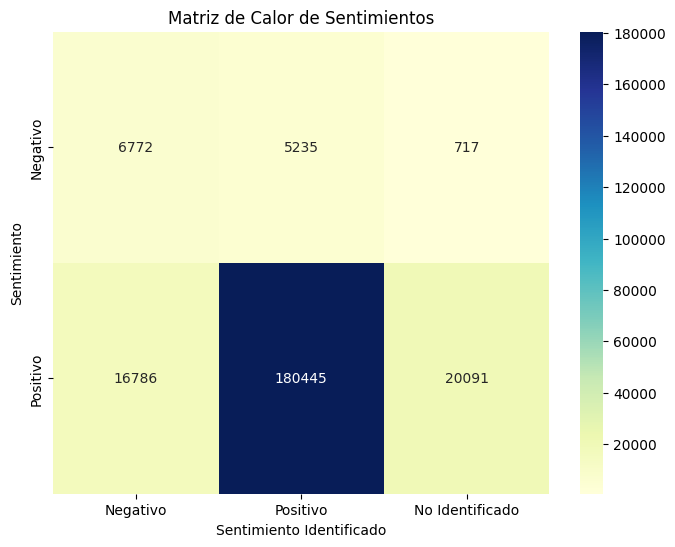

In [ ]:
# Definir los mapeos
sentimiento_mapping = {0: 'Negativo', 1: 'Positivo'}
sentimiento_identificado_mapping = {0: 'Negativo', 1: 'Positivo', 2: 'No Identificado'}

# Mapear los datos
full_data_r['Polarity'] = full_data_r['Polarity'].map(sentimiento_mapping)
full_data_r['PolaridadEstimada'] = full_data_r['PolaridadEstimada'].map(sentimiento_identificado_mapping)

# Crear una tabla de frecuencias (crosstab)
tabla_frecuencias = pd.crosstab(full_data_r['Polarity'], full_data_r['PolaridadEstimada'])

# Reordenar las columnas
column_order = ['Negativo',  'Positivo','No Identificado']
tabla_frecuencias = tabla_frecuencias.reindex(columns=column_order)

# Visualizar la tabla de frecuencias como una matriz de calor
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_frecuencias, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Matriz de Calor de Sentimientos')
plt.xlabel('Sentimiento Identificado')
plt.ylabel('Sentimiento')
plt.show()

##Explicabilidad

In [ ]:
import spacy

# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Frase original
sentence = "estas LINDA EXPERIENCIA"

#sentence =sentence.lower()

print(sentence)

# Tokenizar la frase
doc = nlp(sentence)

# Lematizar cada palabra
lemmatized_words = [token.lemma_ for token in doc]

# Unir las palabras lematizadas en una frase
lemmatized_sentence = ' '.join(lemmatized_words)

# Imprimir los resultados
print("Frase original:", sentence)
print("Frase lematizada:", lemmatized_sentence)


estas LINDA EXPERIENCIA
Frase original: estas LINDA EXPERIENCIA
Frase lematizada: este LINDA EXPERIENCIA


In [ ]:
# Paso 2: Cargar los datos desde el archivo PKL
with open('CORPUS/'+nombredecarpetaatrabajar+'/full_data.pkl', 'rb') as f:
    datos_pkl = pickle.load(f)

# Paso 3: Convertir los datos a un DataFrame de pandas
df = pd.DataFrame(datos_pkl)

# Paso 4: Guardar el DataFrame en un archivo CSV
df.to_csv('archivo.csv', index=False)


In [ ]:
señales="admirar"

aplicicaion = getSELFeatures(señales)
print(aplicicaion)


1
[('Alegría', '0.731'), ('Sorpresa', '0.73')]
admirar
(1, [], [('admirar', 'Alegría', '0.731'), ('admirar', 'Sorpresa', '0.73')])
